In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("H:\\Guvi\Project\\Final project\\Project 3   (Instagram Influencers)\\Influencer.csv")
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [47]:
# Remove '\n' from Channel Info column
df["Channel Info"] = df["Channel Info"].str.replace('\n', '')
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,leomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,selenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,therock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [49]:
# Convert numerical values with 'k', 'm', and 'b' representations
df["Avg. Likes"] = df["Avg. Likes"].str.replace('k', 'e3').str.replace('m', 'e6').str.replace('b', 'e9').astype(float)
df["Posts"] = df["Posts"].str.replace('k', 'e3').str.replace('m', 'e6').str.replace('b', 'e9').astype(float)
df["New Post Avg. Likes"] = df["New Post Avg. Likes"].str.replace('k', 'e3').str.replace('m', 'e6').str.replace('b', 'e9').astype(float)
df["Total Likes"] = df["Total Likes"].str.replace('k', 'e3').str.replace('m', 'e6').str.replace('b', 'e9').astype(float)
df["Followers"] = df["Followers"].str.replace('k', 'e3').str.replace('m', 'e6').str.replace('b', 'e9').astype(float)
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,NaN
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States


In [50]:
df_copy = df.copy()
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Encode the desired column
df_copy['Country Or Region'] = label_encoder.fit_transform(df_copy['Country Or Region'])
df_copy.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,17
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,23
2,3,\nleomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,25
3,4,\nselenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,23
4,5,\ntherock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,23


Are there any correlated features in the given dataset? If yes, state the correlation
coefficient of the pair of features which are highly correlated.

In [56]:
# Calculate correlation coefficients (excluding non-numeric columns)
correlation_matrix = df_copy.drop("Channel Info", axis=1).corr().abs()

# Print correlation coefficients
print(correlation_matrix)

                         Rank  Influence Score  Followers  Avg. Likes   
Rank                 1.000000         0.354843   0.698193    0.277699  \
Influence Score      0.354843         1.000000   0.365428    0.048502   
Followers            0.698193         0.365428   1.000000    0.346829   
Avg. Likes           0.277699         0.048502   0.346829    1.000000   
Posts                0.058132         0.168287   0.069171    0.348795   
60-Day Eng Rate      0.028900         0.072460   0.107439    0.789359   
New Post Avg. Likes  0.272323         0.040011   0.260764    0.892784   
Total Likes          0.465119         0.234987   0.667546    0.361296   
Country Or Region    0.160115         0.177661   0.138642    0.214250   

                        Posts  60-Day Eng Rate  New Post Avg. Likes   
Rank                 0.058132         0.028900             0.272323  \
Influence Score      0.168287         0.072460             0.040011   
Followers            0.069171         0.107439          

In [58]:
# Find the highly correlated pairs
highly_correlated_pairs = correlation_matrix.unstack().sort_values(ascending=False)

# Filter out self-correlations
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs != 1]

# Print the first five highly correlated pairs
print("First five highly correlated pairs:")
print(highly_correlated_pairs.head(10))

First five highly correlated pairs:
Avg. Likes           New Post Avg. Likes    0.892784
New Post Avg. Likes  Avg. Likes             0.892784
                     60-Day Eng Rate        0.866293
60-Day Eng Rate      New Post Avg. Likes    0.866293
                     Avg. Likes             0.789359
Avg. Likes           60-Day Eng Rate        0.789359
Followers            Rank                   0.698193
Rank                 Followers              0.698193
Followers            Total Likes            0.667546
Total Likes          Followers              0.667546
dtype: float64


What is the frequency distribution of the following features?
Influence Score,
Followers,
Posts

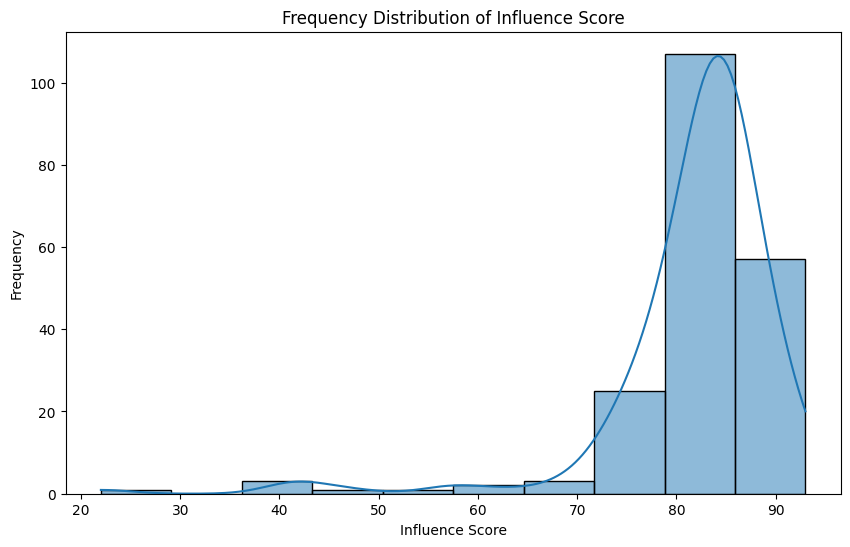

In [27]:
# Plot the frequency distribution of Influence Score
plt.figure(figsize=(10, 6))
sns.histplot(df['Influence Score'], bins=10, kde=True)
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Influence Score')
plt.show()
#left skewed distribution  Mean < Median < Mode (from graph)

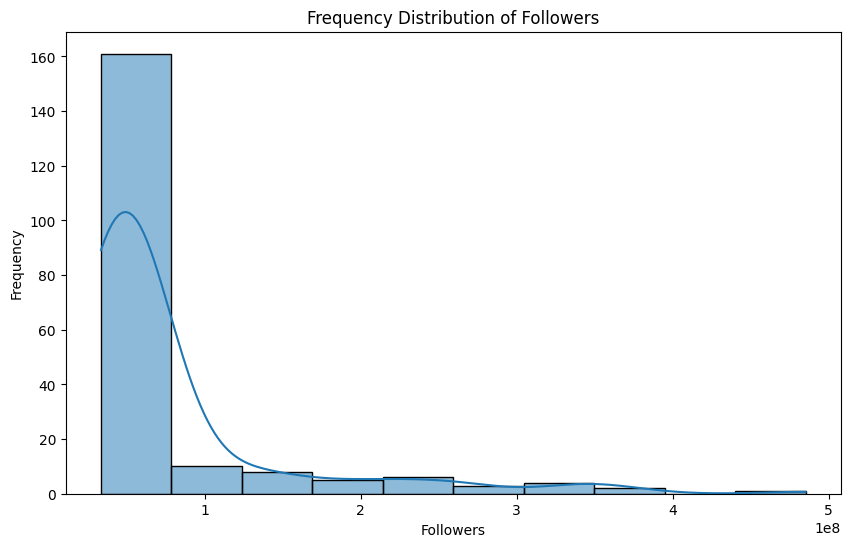

In [28]:
# Plot the frequency distribution of Followers
plt.figure(figsize=(10, 6))
sns.histplot(df['Followers'], bins=10, kde=True)
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Followers')
plt.show()
#right skewed distribution Mode < Median < Mean (from graph)

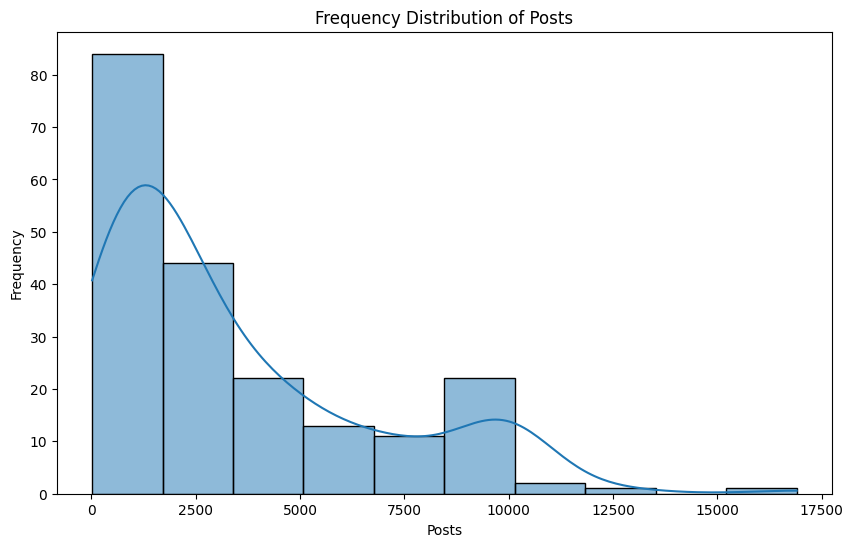

In [29]:

# Plot the frequency distribution of Posts
plt.figure(figsize=(10, 6))
sns.histplot(df['Posts'], bins=10, kde=True)
plt.xlabel('Posts')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Posts')
plt.show()
#right skewed distribution Mode < Median < Mean  (from graph)

In [ ]:
Which country houses the highest number of Instagram Influencers? 

In [70]:
# Count the number of influencers in each country
country_counts = df['Country Or Region'].value_counts()

# Print the count of influencers in different countries
for country, count in country_counts.items():
    print(f"{country}: {count} influencers")

United States: 65 influencers
Brazil: 13 influencers
India: 12 influencers
Indonesia: 7 influencers
France: 6 influencers
Spain: 5 influencers
United Kingdom: 4 influencers
Colombia: 3 influencers
Canada: 3 influencers
Mexico: 2 influencers
Turkey: 2 influencers
Netherlands: 2 influencers
Switzerland: 1 influencers
Germany: 1 influencers
Czech Republic: 1 influencers
British Virgin Islands: 1 influencers
Sweden: 1 influencers
Australia: 1 influencers
Anguilla: 1 influencers
CÃ´te d'Ivoire: 1 influencers
Puerto Rico: 1 influencers
United Arab Emirates: 1 influencers
Italy: 1 influencers
Uruguay: 1 influencers
Russia: 1 influencers


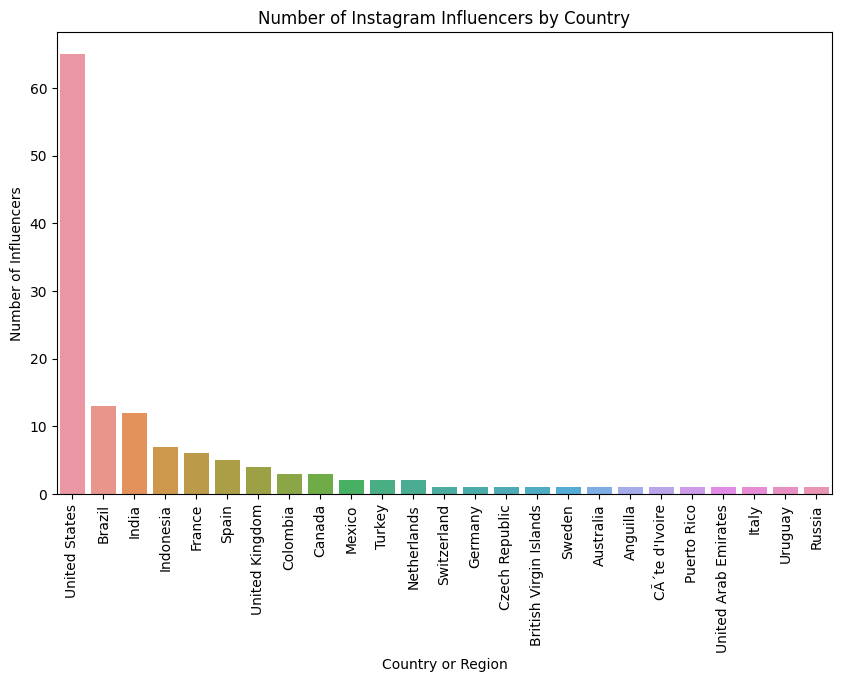

In [69]:
# Plot the count of influencers in different countries
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xlabel('Country or Region')
plt.ylabel('Number of Influencers')
plt.title('Number of Instagram Influencers by Country')
plt.xticks(rotation=90)
plt.show()

Who are the top 10 influencers in the given dataset based on the following features?
Followers,
Average likes,
Total Likes

In [31]:
# Top 10 influencers based on Followers
top_followers = df.nlargest(10, 'Followers')
print("Top 10 influencers based on Followers:")
print(top_followers[['Channel Info', 'Followers']])

Top 10 influencers based on Followers:
      Channel Info    Followers
0        cristiano  485200000.0
1      kyliejenner  370700000.0
2         leomessi  363900000.0
3      selenagomez  348800000.0
4          therock  339400000.0
5     arianagrande  333000000.0
6    kimkardashian  330700000.0
7          beyonce  276100000.0
8  khloekardashian  273900000.0
9     justinbieber  260000000.0


In [32]:
# Top 10 influencers based on Average Likes
top_avg_likes = df.nlargest(10, 'Avg. Likes')
print("Top 10 influencers based on Average Likes:")
print(top_avg_likes[['Channel Info', 'Avg. Likes']])

Top 10 influencers based on Average Likes:
     Channel Info  Avg. Likes
96            thv  15400000.0
131           j.m  14400000.0
165         rkive  10600000.0
0       cristiano   8700000.0
32   billieeilish   8400000.0
1     kyliejenner   8200000.0
2        leomessi   6700000.0
3     selenagomez   6100000.0
38   lalalalisa_m   6000000.0
22        zendaya   5900000.0


In [33]:
# Top 10 influencers based on Total Likes
top_total_likes = df.nlargest(10, 'Total Likes')
print("Top 10 influencers based on Total Likes:")
print(top_total_likes[['Channel Info', 'Total Likes']])

Top 10 influencers based on Total Likes:
     Channel Info   Total Likes
1     kyliejenner  5.740000e+10
0       cristiano  2.910000e+10
22        zendaya  2.080000e+10
6   kimkardashian  1.980000e+10
5    arianagrande  1.850000e+10
25     badgalriri  1.800000e+10
19       neymarjr  1.440000e+10
9    justinbieber  1.400000e+10
16     nickiminaj  1.290000e+10
4         therock  1.260000e+10


Describe the relationship between the following pairs of features using a suitable graph:
Followers and Total Likes,
Followers and Influence Score,
Posts and Average likes,
Posts and Influence Score

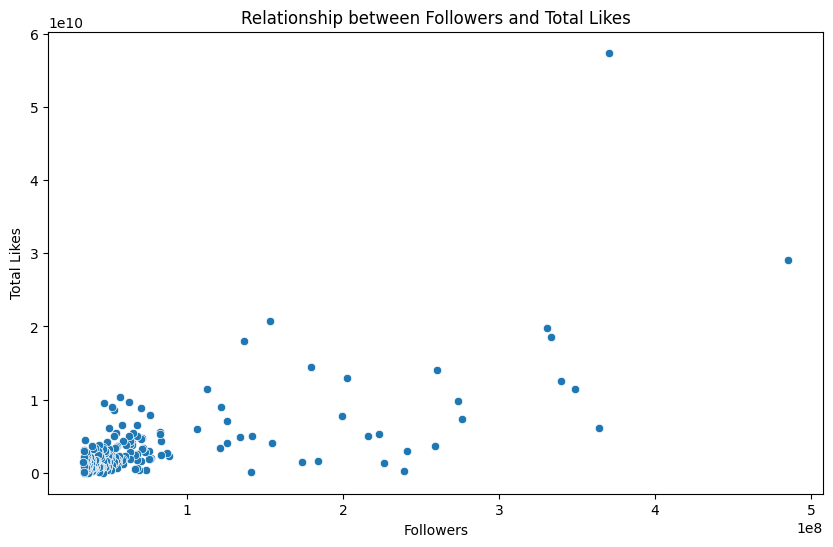

In [34]:
# Relationship between Followers and Total Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Followers', y='Total Likes')
plt.xlabel('Followers')
plt.ylabel('Total Likes')
plt.title('Relationship between Followers and Total Likes')
plt.show()

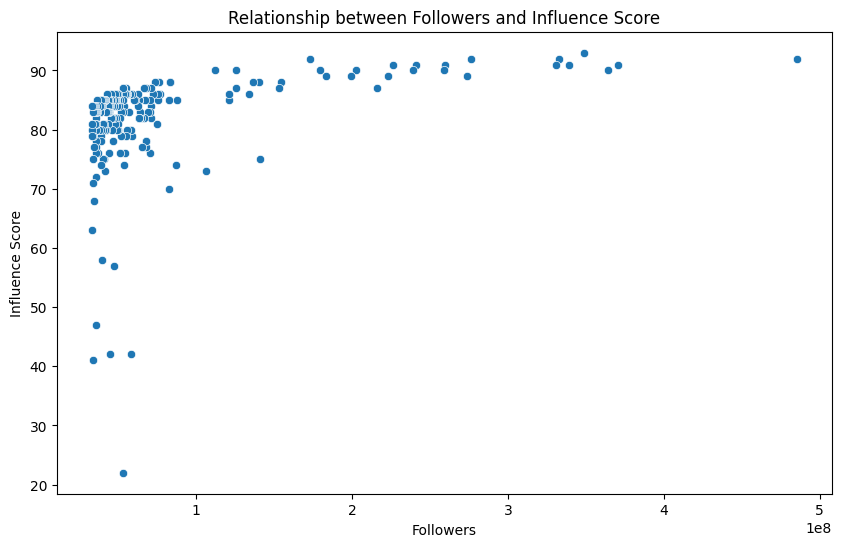

In [35]:
# Relationship between Followers and Influence Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Followers', y='Influence Score')
plt.xlabel('Followers')
plt.ylabel('Influence Score')
plt.title('Relationship between Followers and Influence Score')
plt.show()

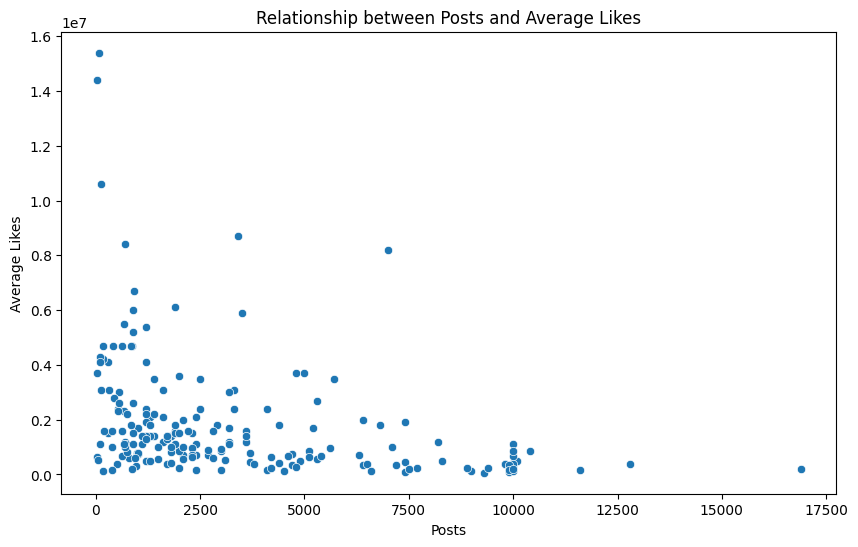

In [36]:
# Relationship between Posts and Average Likes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Posts', y='Avg. Likes')
plt.xlabel('Posts')
plt.ylabel('Average Likes')
plt.title('Relationship between Posts and Average Likes')
plt.show()

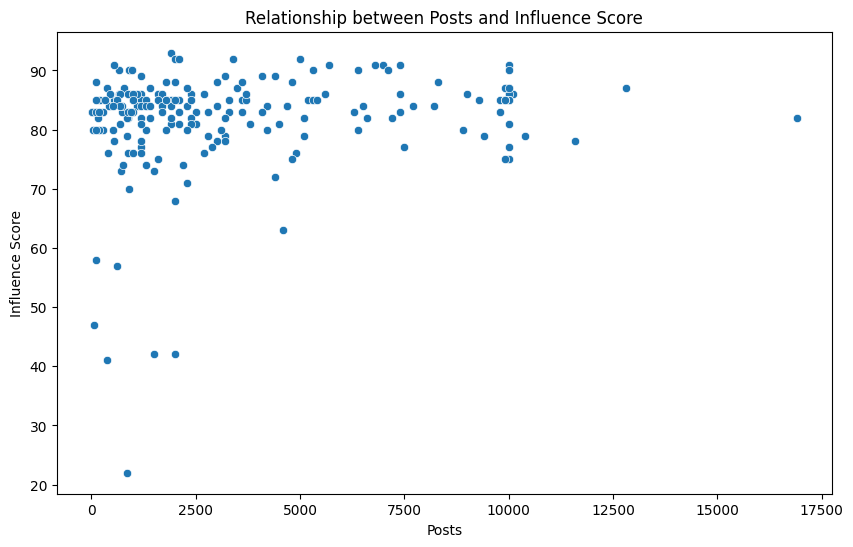

In [37]:
# Relationship between Posts and Influence Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Posts', y='Influence Score')
plt.xlabel('Posts')
plt.ylabel('Influence Score')
plt.title('Relationship between Posts and Influence Score')
plt.show()